<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_4X/blob/main/GQtest_data_multi_delta_(_0_4)_n20_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_4X/multiplication_delta_-0.4'

In [4]:
os.listdir(base_path)

['data_multi_delta_-0.4_n20.csv',
 'data_multi_delta_-0.4_n30.csv',
 'data_multi_delta_-0.4_n60.csv',
 'data_multi_delta_-0.4_n120.csv',
 'data_multi_delta_-0.4_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-0.4_n20.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,48.481650,37.293776,45.136774,51.712753,0.128149,192.753101,192.453082,0.300019
1,0.0,1.0,84.088126,46.317490,61.499743,56.864026,-0.545787,258.223597,258.676163,-0.452566
2,0.0,2.0,37.073327,44.663800,31.513034,85.051779,0.692578,208.994519,208.521094,0.473424
3,0.0,3.0,70.986771,98.809577,71.929248,40.896853,-0.569323,292.053126,292.143082,-0.089956
4,0.0,4.0,41.766080,20.801710,87.981283,22.727995,-0.824172,182.452896,182.845044,-0.392148
...,...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,81.716878,43.795474,92.022872,81.890247,-0.417440,309.008033,309.469819,-0.461786
19996,999.0,16.0,73.295260,90.046240,80.564500,77.747321,-0.145492,331.507828,331.785955,-0.278127
19997,999.0,17.0,79.617727,86.096677,92.855938,41.125300,0.757603,310.453244,309.760816,0.692428
19998,999.0,18.0,58.394266,61.807039,69.408835,84.961710,0.033891,284.605740,284.601746,0.003995


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,48.481650,37.293776,45.136774,51.712753,0.128149,192.753101,192.453082,0.300019
1,0.0,1.0,84.088126,46.317490,61.499743,56.864026,-0.545787,258.223597,258.676163,-0.452566
2,0.0,2.0,37.073327,44.663800,31.513034,85.051779,0.692578,208.994519,208.521094,0.473424
3,0.0,3.0,70.986771,98.809577,71.929248,40.896853,-0.569323,292.053126,292.143082,-0.089956
4,0.0,4.0,41.766080,20.801710,87.981283,22.727995,-0.824172,182.452896,182.845044,-0.392148
...,...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,81.716878,43.795474,92.022872,81.890247,-0.417440,309.008033,309.469819,-0.461786
19996,999.0,16.0,73.295260,90.046240,80.564500,77.747321,-0.145492,331.507828,331.785955,-0.278127
19997,999.0,17.0,79.617727,86.096677,92.855938,41.125300,0.757603,310.453244,309.760816,0.692428
19998,999.0,18.0,58.394266,61.807039,69.408835,84.961710,0.033891,284.605740,284.601746,0.003995


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    48.481650  37.293776  45.136774  51.712753  0.128149  192.753101   
      1.0    84.088126  46.317490  61.499743  56.864026 -0.545787  258.223597   
      2.0    37.073327  44.663800  31.513034  85.051779  0.692578  208.994519   
      3.0    70.986771  98.809577  71.929248  40.896853 -0.569323  292.053126   
      4.0    41.766080  20.801710  87.981283  22.727995 -0.824172  182.452896   
...                ...        ...        ...        ...       ...         ...   
999.0 15.0   81.716878  43.795474  92.022872  81.890247 -0.417440  309.008033   
      16.0   73.295260  90.046240  80.564500  77.747321 -0.145492  331.507828   
      17.0   79.617727  86.096677  92.855938  41.125300  0.757603  310.453244   
      18.0   58.394266  61.807039  69.408835  84.961710  0.033891  284.605740   
      19.0   30.070187  48.056524  51.790934  87.646085 -0.089336  227.474394   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    192.453082  0.300019  
      1.0    258.676163 -0.452566  
      2.0    208.521094  0.473424  
      3.0    292.143082 -0.089956  
      4.0    182.845044 -0.392148  
...                 ...       ...  
999.0 15.0   309.469819 -0.461786  
      16.0   331.785955 -0.278127  
      17.0   309.760816  0.692428  
      18.0   284.601746  0.003995  
      19.0   227.476764 -0.002370  

[20000 rows x 8 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    48.481650  37.293776  45.136774  51.712753  0.128149  192.753101   
      1.0    84.088126  46.317490  61.499743  56.864026 -0.545787  258.223597   
      2.0    37.073327  44.663800  31.513034  85.051779  0.692578  208.994519   
      3.0    70.986771  98.809577  71.929248  40.896853 -0.569323  292.053126   
      4.0    41.766080  20.801710  87.981283  22.727995 -0.824172  182.452896   
...                ...        ...        ...        ...       ...         ...   
999.0 15.0   81.716878  43.795474  92.022872  81.890247 -0.417440  309.008033   
      16.0   73.295260  90.046240  80.564500  77.747321 -0.145492  331.507828   
      17.0   79.617727  86.096677  92.855938  41.125300  0.757603  310.453244   
      18.0   58.394266  61.807039  69.408835  84.961710  0.033891  284.605740   
      19.0   30.070187  48.056524  51.790934  87.646085 -0.089336  227.474394   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    192.453082  0.300019  
      1.0    258.676163 -0.452566  
      2.0    208.521094  0.473424  
      3.0    292.143082 -0.089956  
      4.0    182.845044 -0.392148  
...                 ...       ...  
999.0 15.0   309.469819 -0.461786  
      16.0   331.785955 -0.278127  
      17.0   309.760816  0.692428  
      18.0   284.601746  0.003995  
      19.0   227.476764 -0.002370  

[20000 rows x 8 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,48.481650,37.293776,45.136774,51.712753,0.128149,192.753101,192.453082,0.300019
1,0.0,1.0,84.088126,46.317490,61.499743,56.864026,-0.545787,258.223597,258.676163,-0.452566
2,0.0,2.0,37.073327,44.663800,31.513034,85.051779,0.692578,208.994519,208.521094,0.473424
3,0.0,3.0,70.986771,98.809577,71.929248,40.896853,-0.569323,292.053126,292.143082,-0.089956
4,0.0,4.0,41.766080,20.801710,87.981283,22.727995,-0.824172,182.452896,182.845044,-0.392148
...,...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,81.716878,43.795474,92.022872,81.890247,-0.417440,309.008033,309.469819,-0.461786
19996,999.0,16.0,73.295260,90.046240,80.564500,77.747321,-0.145492,331.507828,331.785955,-0.278127
19997,999.0,17.0,79.617727,86.096677,92.855938,41.125300,0.757603,310.453244,309.760816,0.692428
19998,999.0,18.0,58.394266,61.807039,69.408835,84.961710,0.033891,284.605740,284.601746,0.003995


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    48.481650  37.293776  45.136774  51.712753  0.128149  192.753101   
      1.0    84.088126  46.317490  61.499743  56.864026 -0.545787  258.223597   
      2.0    37.073327  44.663800  31.513034  85.051779  0.692578  208.994519   
      3.0    70.986771  98.809577  71.929248  40.896853 -0.569323  292.053126   
      4.0    41.766080  20.801710  87.981283  22.727995 -0.824172  182.452896   
...                ...        ...        ...        ...       ...         ...   
999.0 15.0   81.716878  43.795474  92.022872  81.890247 -0.417440  309.008033   
      16.0   73.295260  90.046240  80.564500  77.747321 -0.145492  331.507828   
      17.0   79.617727  86.096677  92.855938  41.125300  0.757603  310.453244   
      18.0   58.394266  61.807039  69.408835  84.961710  0.033891  284.605740   
      19.0   30.070187  48.056524  51.790934  87.646085 -0.089336  227.474394   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    192.453082  0.300019  
      1.0    258.676163 -0.452566  
      2.0    208.521094  0.473424  
      3.0    292.143082 -0.089956  
      4.0    182.845044 -0.392148  
...                 ...       ...  
999.0 15.0   309.469819 -0.461786  
      16.0   331.785955 -0.278127  
      17.0   309.760816  0.692428  
      18.0   284.601746  0.003995  
      19.0   227.476764 -0.002370  

[20000 rows x 8 columns]

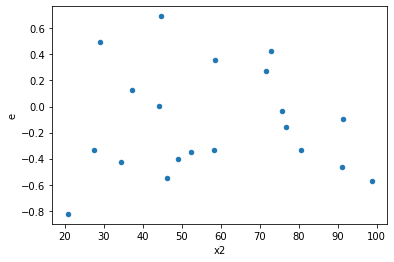

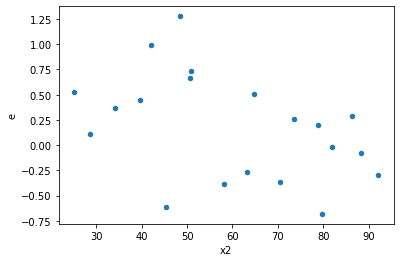

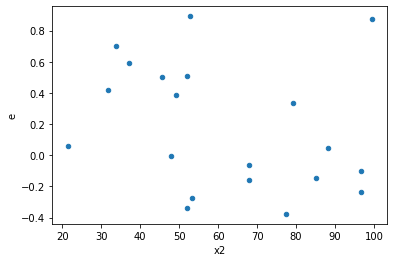

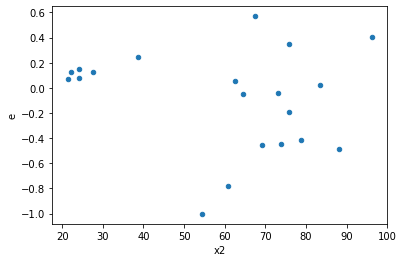

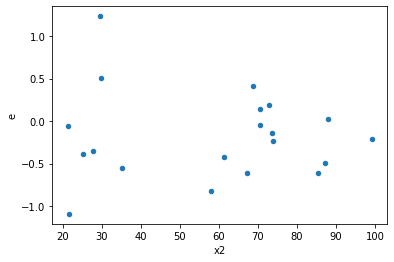

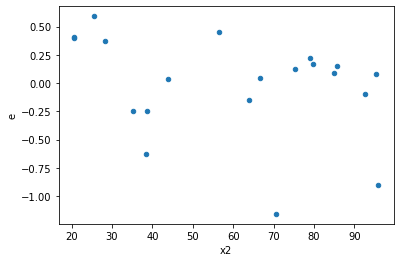

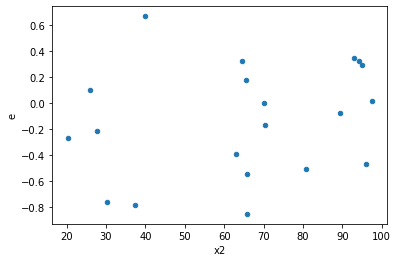

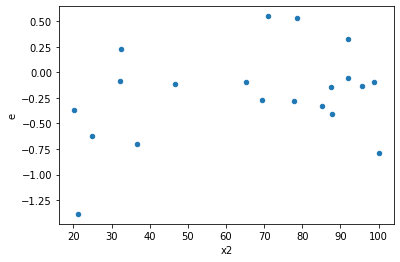

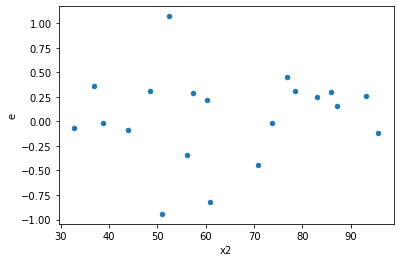

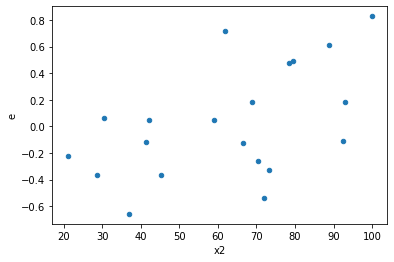

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x2
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3', 'x4']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
2.0,4.0,4.0,0.2093258301755727,0.22105123260573864,0.05233145754389318,0.05526280815143466,1.056015076688487,0.9591433802936415,0.5204283098531792,0.4795716901468208,Reject005=1 : Homoscedasticity
3.0,4.0,4.0,0.24570132794765054,0.35969618073494,0.061425331986912635,0.089924045183735,1.4639570072310613,0.7208918464373142,0.6395540767813429,0.3604459232186571,Reject005=1 : Homoscedasticity
11.0,4.0,4.0,0.16222369731481637,0.20240362625660815,0.04055592432870409,0.05060090656415204,1.2476822412931285,0.8353772728698063,0.5823113635650968,0.41768863643490317,Reject005=1 : Homoscedasticity
13.0,4.0,4.0,0.14306688567199427,0.21269860080481223,0.03576672141799857,0.05317465020120306,1.4867074222364831,0.7101634089896387,0.6449182955051806,0.35508170449481935,Reject005=1 : Homoscedasticity
14.0,4.0,4.0,0.6333427957654687,0.6767722539115532,0.15833569894136718,0.1691930634778883,1.0685718041421706,0.9502941933449303,0.5248529033275349,0.47514709667246513,Reject005=1 : Homoscedasticity
18.0,4.0,4.0,0.2915789785165444,0.4335962930843846,0.0728947446291361,0.10839907327109614,1.4870629401693374,0.7099975659474291,0.6450012170262854,0.35499878297371457,Reject005=1 : Homoscedasticity
19.0,4.0,4.0,0.5612750088390775,1.0123963014926651,0.1403187522097694,0.2530990753731663,1.80374377185735,0.5817769044031567,0.7091115477984217,0.29088845220157833,Reject005=1 : Homoscedasticity
20.0,4.0,4.0,0.5152966821966863,0.7595247449841531,0.12882417054917158,0.18988118624603828,1.4739562105199933,0.7161482937683026,0.6419258531158487,0.3580741468841513,Reject005=1 : Homoscedasticity
21.0,4.0,4.0,0.0636379401807077,0.07390933474153955,0.015909485045176926,0.018477333685384886,1.1614036301562396,0.888195145366333,0.5559024273168335,0.4440975726831665,Reject005=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,4.0,4.0,0.25463662119893077,0.04485850747351197,0.06365915529973269,0.011214626868377993,0.17616675583543415,0.12116425184642618,Reject005=1 : Homoscedasticity
1.0,4.0,4.0,1.3679042215855886,0.34826030739479524,0.34197605539639714,0.08706507684869881,0.2545940731077749,0.2136553187270684,Reject005=1 : Homoscedasticity
2.0,4.0,4.0,0.2093258301755727,0.22105123260573864,0.05233145754389318,0.05526280815143466,1.056015076688487,0.9591433802936415,Reject005=1 : Homoscedasticity
3.0,4.0,4.0,0.24570132794765054,0.35969618073494,0.061425331986912635,0.089924045183735,1.4639570072310613,0.7208918464373142,Reject005=1 : Homoscedasticity
4.0,4.0,4.0,3.0018169191767927,0.24226261867970653,0.7504542297941982,0.06056565466992663,0.08070532787394101,0.031795282654161865,Reject005=0 : Heteroscedasticity
5.0,4.0,4.0,0.32055059716253076,0.25239159825989155,0.08013764929063269,0.06309789956497289,0.7873689847843892,0.8223970963390884,Reject005=1 : Homoscedasticity
6.0,4.0,4.0,0.6456805236988116,0.3162242017204046,0.1614201309247029,0.07905605043010115,0.4897533534214401,0.5063332533849533,Reject005=1 : Homoscedasticity
7.0,4.0,4.0,1.2362132262381276,0.32264248083825714,0.3090533065595319,0.08066062020956428,0.26099258120710933,0.22156366329228339,Reject005=1 : Homoscedasticity
8.0,4.0,4.0,1.1322151380889338,0.13349214481300598,0.28305378452223345,0.033373036203251494,0.11790351526153182,0.0620487746272357,Reject005=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      897
Reject005=0 : Heteroscedasticity    103
Name: Result_test, dtype: int64